In [ ]:
# healthcare data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset.csv


In [ ]:
df =pd.read_csv('healthcare_dataset.csv')
df_raw = df.copy()

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [ ]:
df['Discharge Date'] - df['Date of Admission']
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

In [ ]:
df[['Date of Admission', 'Discharge Date']].dtypes

,0
Date of Admission,datetime64[ns]
Discharge Date,datetime64[ns]


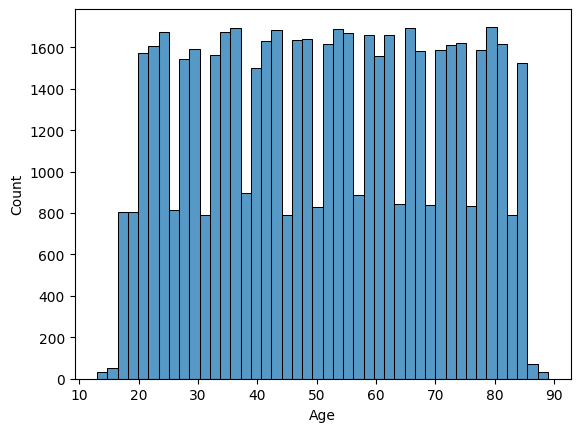

In [ ]:
#explore data with EDA Method
#taburan umur
sns.histplot(df['Age'])
plt.show()

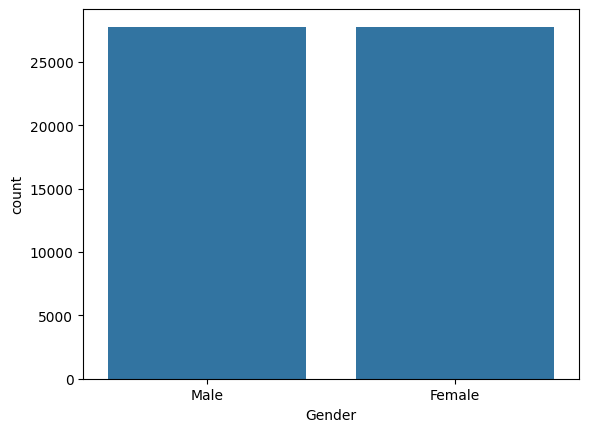

In [ ]:
sns.countplot(x='Gender',data=df)
plt.show()

In [ ]:
df['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


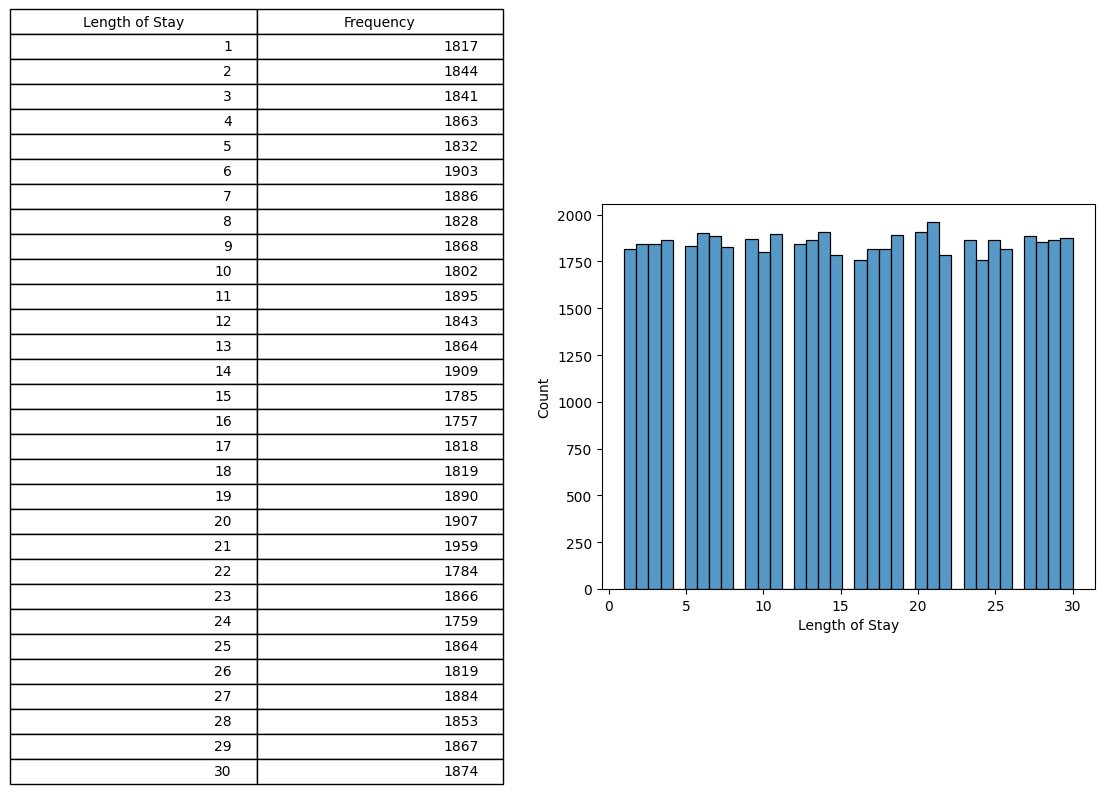

<Axes: xlabel='Length of Stay', ylabel='Count'>

In [ ]:
# table dan chart utk length of stay
fig, axes = plt.subplots(1,2, figsize=(14,5))

#table utk length of stay
freq_table = df['Length of Stay'].value_counts().sort_index().reset_index()
freq_table.columns = ['Length of Stay', 'Frequency']

axes[0].axis('off')  # buang axis
table = axes[0].table(
    cellText=freq_table.values,
    colLabels=freq_table.columns,
    loc='center'
)
table.scale(1, 1.5)
axes[0]


#graf utk length of  stay
sns.histplot(df['Length of Stay'])
plt.show()
axes[1]

In [ ]:
# table hospital with billing amount and patient number
billing_summary = (
    df.groupby('Hospital')['Billing Amount']
    .agg(['count', 'sum', 'mean', 'min', 'max'])
    .reset_index()
)

billing_summary

,Hospital,count,sum,mean,min,max
0,Abbott Inc,1,38052.041917,38052.041917,38052.041917,38052.041917
1,Abbott Ltd,1,29877.586483,29877.586483,29877.586483,29877.586483
2,"Abbott Moore and Williams,",1,24799.596339,24799.596339,24799.596339,24799.596339
3,"Abbott and Thompson, Sullivan",1,16738.569765,16738.569765,16738.569765,16738.569765
4,"Abbott, Peters and Hoffman",2,37684.793727,18842.396863,18842.396863,18842.396863
...,...,...,...,...,...,...
39871,and Zimmerman Sons,1,32706.652625,32706.652625,32706.652625,32706.652625
39872,"and Zuniga Davis Carlson,",1,42867.041298,42867.041298,42867.041298,42867.041298
39873,"and Zuniga Francis Peterson,",1,33689.630726,33689.630726,33689.630726,33689.630726
39874,and Zuniga Sons,1,33950.170483,33950.170483,33950.170483,33950.170483


In [ ]:
df['Admission Type'].value_counts()

,count
Admission Type,
Elective,18655
Urgent,18576
Emergency,18269


In [ ]:
df['Medication'].value_counts()

,count
Medication,
Lipitor,11140
Ibuprofen,11127
Aspirin,11094
Paracetamol,11071
Penicillin,11068


In [ ]:
df['Test Results'].value_counts()

,count
Test Results,
Abnormal,18627
Normal,18517
Inconclusive,18356


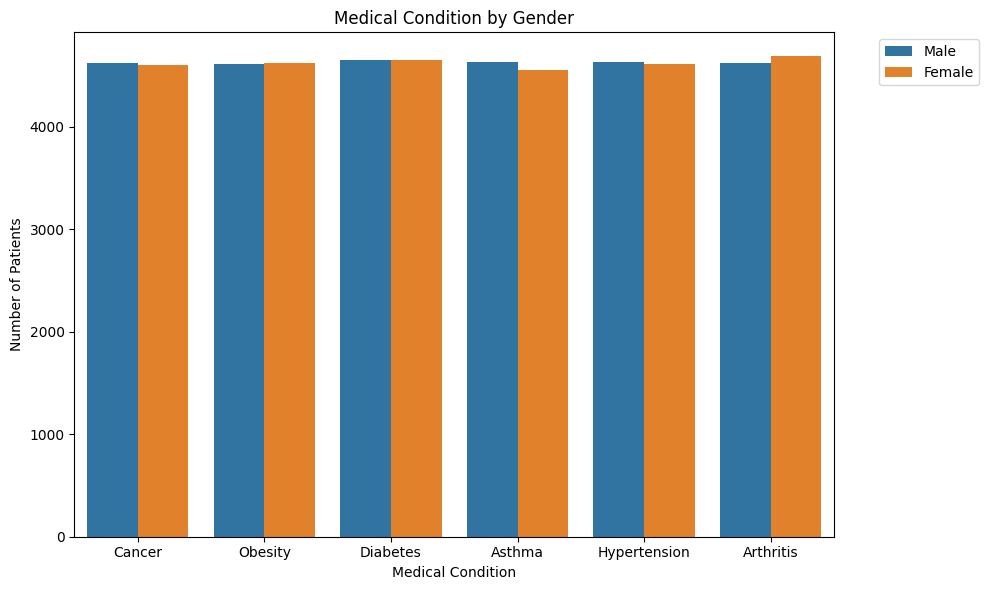

In [ ]:
# chart utk gender and medical condition
plt.figure(figsize=(10,6))
sns.countplot(
    x='Medical Condition',
    hue = 'Gender',
    data=df
)
plt.title('Medical Condition by Gender')
plt.ylabel('Number of Patients')

ax = plt.gca()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

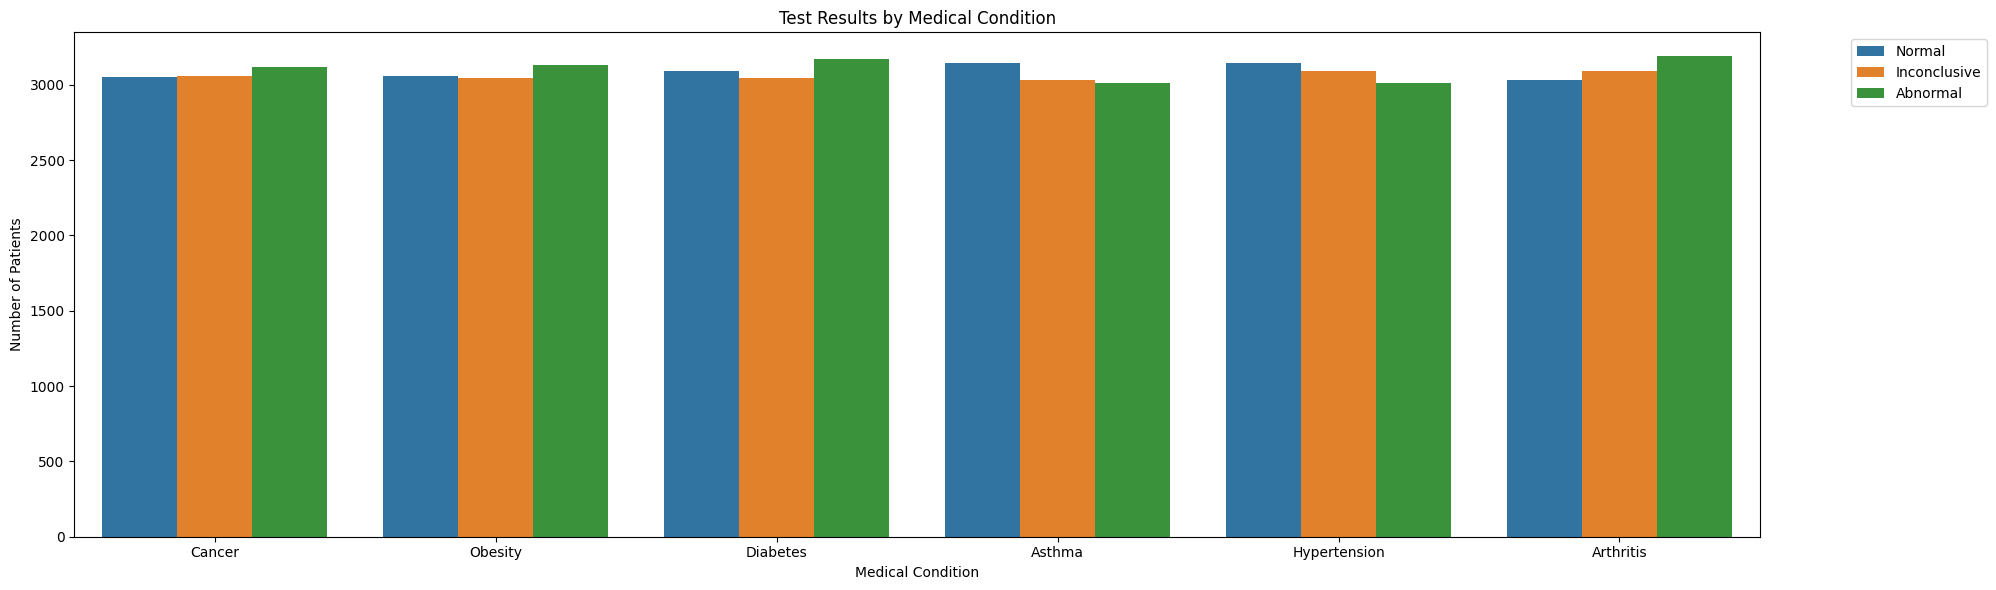

In [ ]:
#chart medical condition by test results
plt.figure(figsize=(20,6))
sns.countplot(
    x='Medical Condition',
    hue='Test Results',
    data=df
)
plt.title('Test Results by Medical Condition')
plt.ylabel('Number of Patients')

ax = plt.gca()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

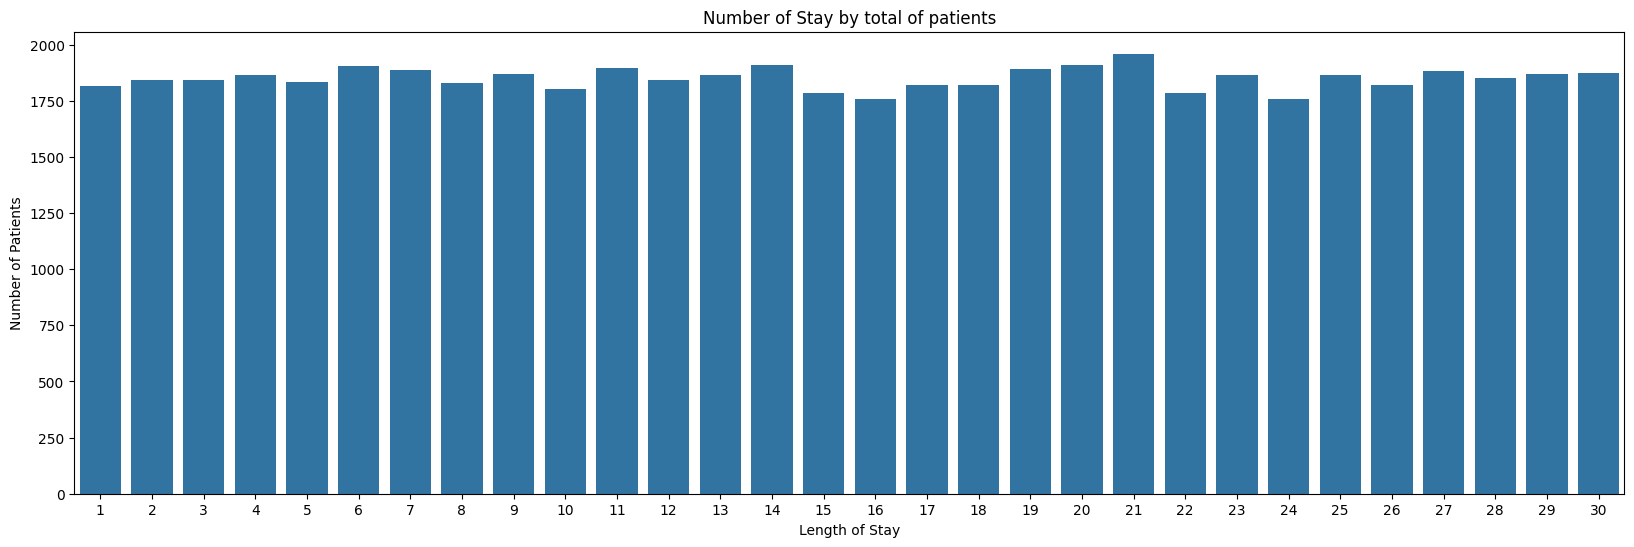

In [ ]:
#Chart number of stay bt total of patients

plt.figure(figsize=(20,6))
sns.countplot(
    x='Length of Stay',
    data = df
)
plt.title('Number of Stay by total of patients' )
plt.ylabel('Number of Patients')
plt.show()


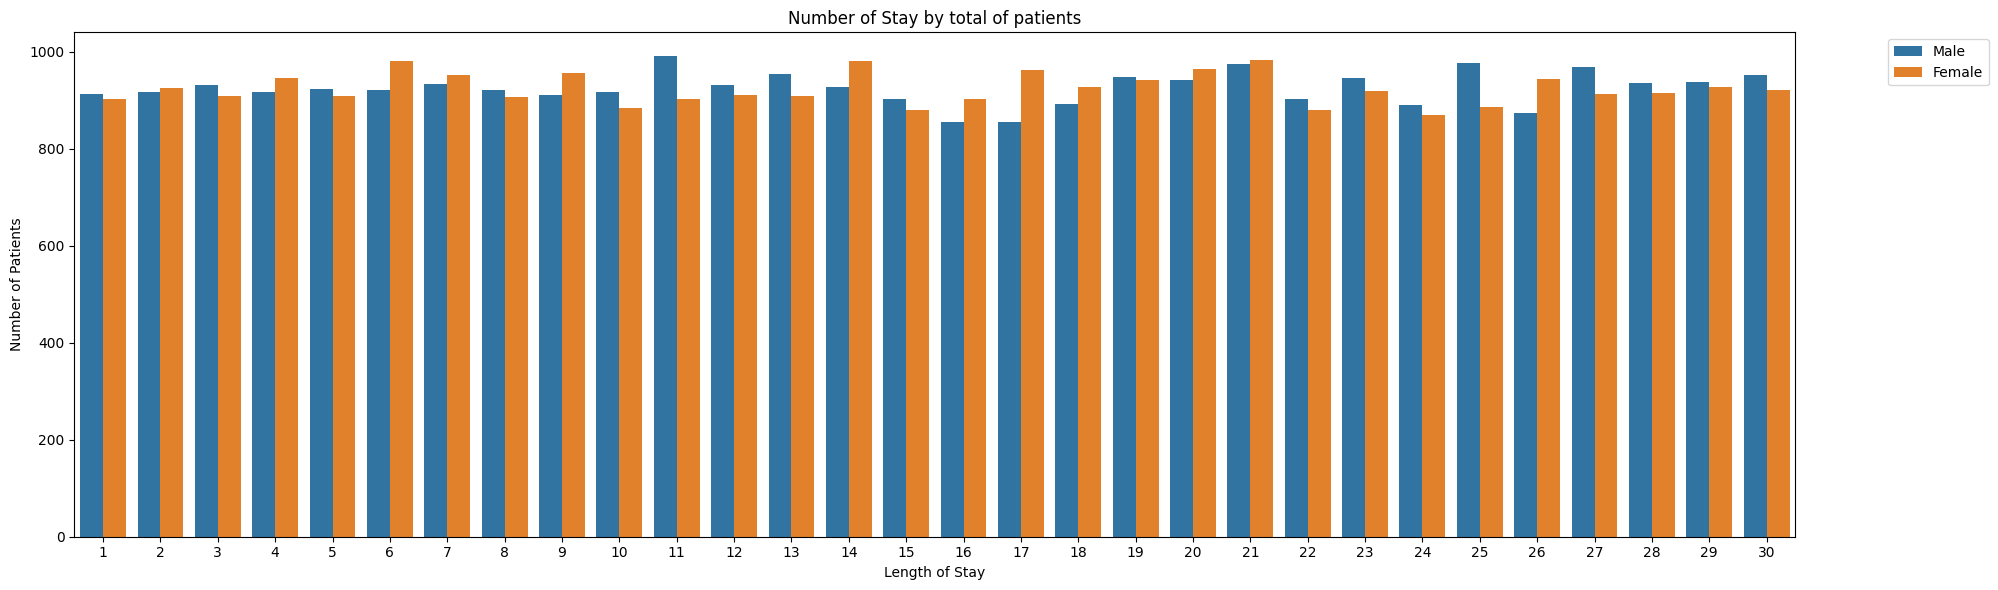

In [ ]:
#Chart number of stay bt total of patients by gender

plt.figure(figsize=(20,6))
sns.countplot(
    x='Length of Stay',
    hue='Gender',
    data = df
)
plt.title('Number of Stay by total of patients' )
plt.ylabel('Number of Patients')

ax = plt.gca()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

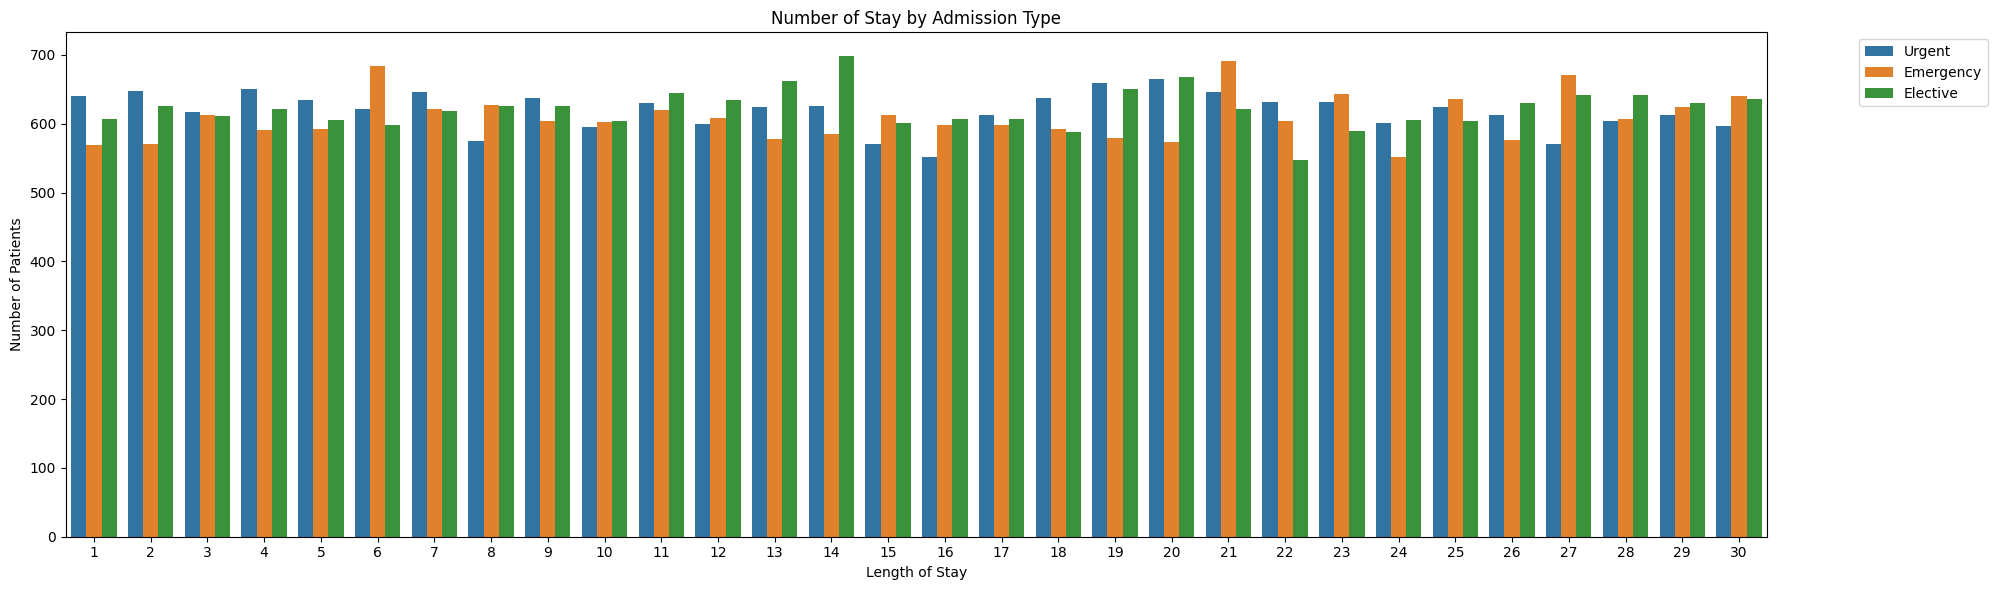

In [ ]:
#Chart length of stay by admission type

plt.figure(figsize=(20,6))
sns.countplot(
    x='Length of Stay',
    hue = 'Admission Type',
    data = df
)
plt.title('Number of Stay by Admission Type' )
plt.ylabel('Number of Patients')

ax = plt.gca()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

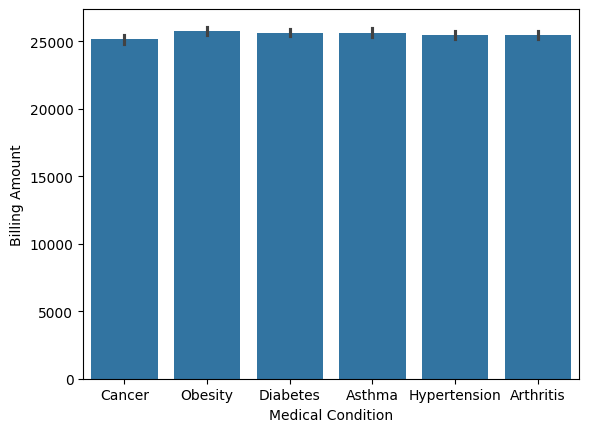

In [ ]:
#Chart billing amount by medical condition

sns.barplot(y='Billing Amount',x= 'Medical Condition', data=df)
plt.show()

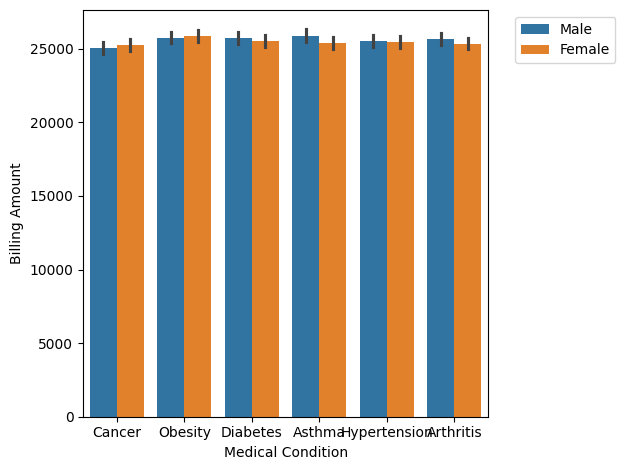

In [ ]:
#Chart billing amount by medical condition and gender

sns.barplot(y='Billing Amount',
            hue= 'Gender',
            x= 'Medical Condition',
            data=df
)

ax = plt.gca()
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



/tmp/ipython-input-2691585472.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


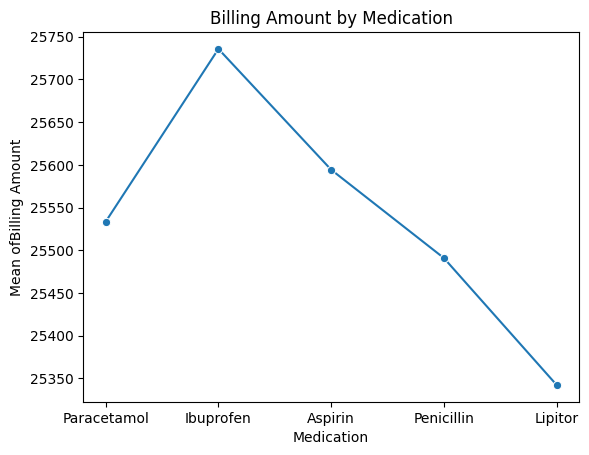

In [ ]:
sns.lineplot(
    x='Medication',
    y='Billing Amount',
    data=df,
    marker='o',  # tanda titik kat setiap category
    ci = None   # buang confidence interval
)
plt.title('Billing Amount by Medication')
plt.ylabel('Mean ofBilling Amount')
plt.xlabel('Medication')
plt.show()

Text(0, 0.5, 'Billing Amount')

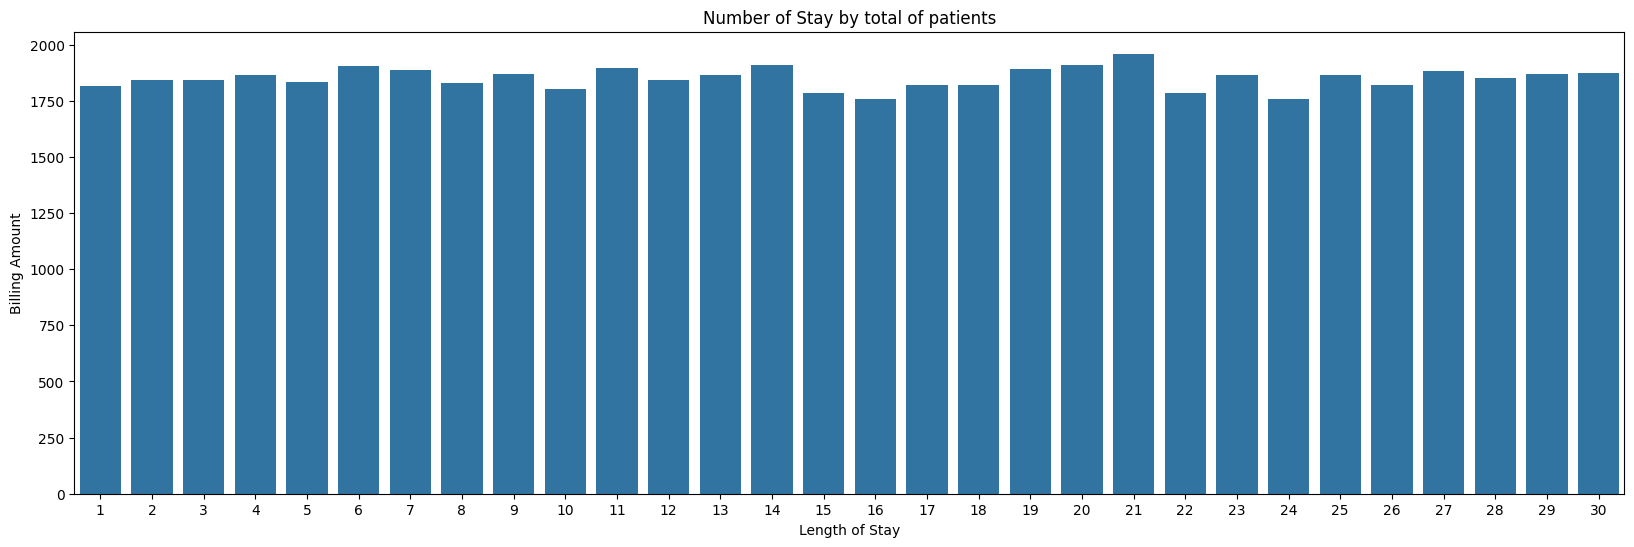

In [ ]:
# chart billing amount by length of stay


plt.figure(figsize=(20,6))
sns.countplot(
    x='Length of Stay',
    data = df
)
plt.title('Number of Stay by total of patients' )
plt.ylabel('Billing Amount')

In [ ]:
#simpan output
df.to_csv('healthcare_dataset_clean.csv',index=False)

In [ ]:
from google.colab import files
files.download('healthcare_dataset_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>